In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/asassn/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asassn/asassn_for_ML.csv
/kaggle/input/asassn/variable_to_solve.csv


In [3]:
os.chdir('/kaggle/input/asassn/')

In [4]:
df1=pd.read_csv('asassn_for_ML.csv')

In [5]:
df1.ML_classification.value_counts()

SR       189404
ROT       53169
EW        47570
EA        21927
RRAB      19035
L         13938
EB        13371
RRC        6968
M          6650
DSCT       2395
HADS       2231
VAR         559
RRD         512
DCEP        434
YSO         356
CWA         153
DCEPS       112
CWB          74
RVA           3
Name: ML_classification, dtype: int64

In [6]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
df2 = df1.fillna(0)

In [78]:
df1.columns

Index(['Unnamed: 0', 'ID', 'ML_classification', 'Mean_gmag', 'Amplitude',
       'Period', 'parallax', 'parallax_over_error', 'pm', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'bp_rp', 'FUVmag', 'NUVmag',
       'W1mag', 'W2mag', 'W3mag', 'W4mag', 'Jmag', 'Hmag', 'Kmag'],
      dtype='object')

In [96]:
features = ['Mean_gmag', 'Amplitude',
       'Period', 'parallax', 'phot_g_mean_mag',
        'bp_rp']
classes = ['ML_classification','Mean_gmag']

In [97]:
X=df2[features]
y=df2[classes]

In [98]:
enc=OrdinalEncoder()
enc.fit(y)
y_trans = enc.transform(y)
y1 = pd.Series(y_trans[:,0], name='Class')
y1


0          5.0
1         12.0
2         12.0
3          7.0
4         12.0
          ... 
378856    11.0
378857    16.0
378858     7.0
378859    14.0
378860    11.0
Name: Class, Length: 378861, dtype: float64

In [99]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y1, train_size=0.8, test_size=0.2,random_state=0)

In [100]:
model = LinearRegression()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index)
y_pred = pd.DataFrame(model.predict(X_valid), index=X_valid.index)

In [101]:
train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_valid, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

Train RMSE: 2.81
Test RMSE: 2.80


In [62]:
import matplotlib.pyplot as plt

In [102]:
y_pred, y_valid


(                0
 268914  14.704433
 147546   8.869941
 103029  12.794023
 70311    9.493551
 274384  13.983698
 ...           ...
 208827   9.012250
 232523  18.614774
 39803   13.413164
 95588    8.942202
 174438  14.528929
 
 [75773 rows x 1 columns],
 268914    16.0
 147546    13.0
 103029    16.0
 70311      7.0
 274384    16.0
           ... 
 208827     6.0
 232523    16.0
 39803     16.0
 95588     13.0
 174438    16.0
 Name: Class, Length: 75773, dtype: float64)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Mean_gmag'}>,
        <AxesSubplot:title={'center':'Amplitude'}>,
        <AxesSubplot:title={'center':'Period'}>],
       [<AxesSubplot:title={'center':'parallax'}>,
        <AxesSubplot:title={'center':'parallax_over_error'}>,
        <AxesSubplot:title={'center':'pm'}>,
        <AxesSubplot:title={'center':'phot_g_mean_mag'}>],
       [<AxesSubplot:title={'center':'phot_bp_mean_mag'}>,
        <AxesSubplot:title={'center':'phot_rp_mean_mag'}>,
        <AxesSubplot:title={'center':'bp_rp'}>,
        <AxesSubplot:title={'center':'FUVmag'}>],
       [<AxesSubplot:title={'center':'NUVmag'}>,
        <AxesSubplot:title={'center':'W1mag'}>,
        <AxesSubplot:title={'center':'W2mag'}>,
        <AxesSubplot:title={'center':'W3mag'}>],
       [<AxesSubplot:title={'center':'W4mag'}>,
        <AxesSubplot:title={'center':'Jmag'}>,
        <AxesSubplot:title={'center':'Hmag'}>,
        <AxesSubplot:tit

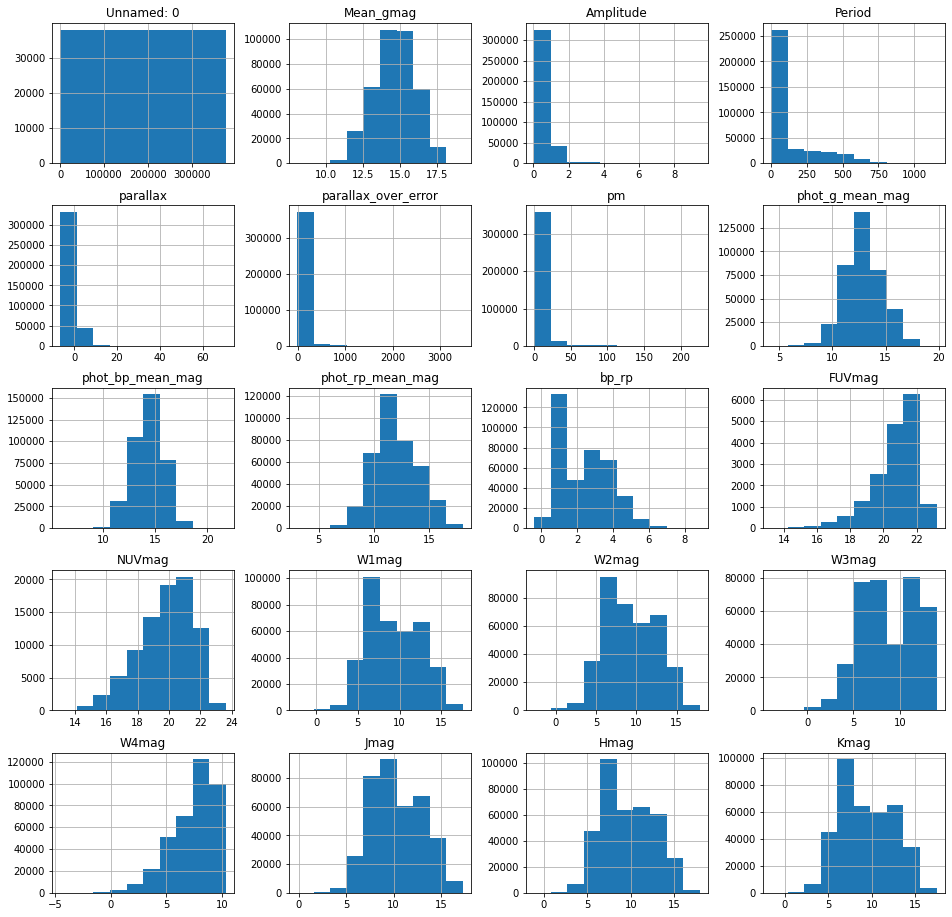

In [4]:
df1.hist(figsize=(16,16))

<AxesSubplot:>

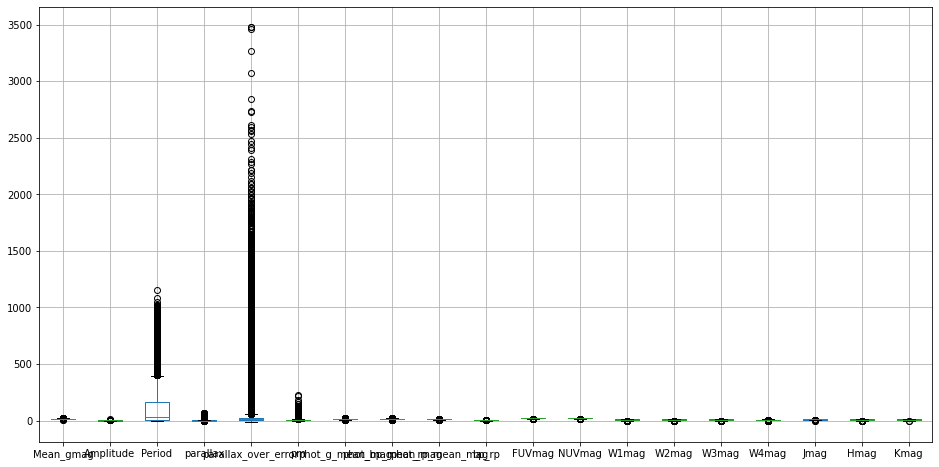

In [9]:
df1.drop(columns='Unnamed: 0').boxplot(figsize=(16,8))

In [8]:
df2.var().round(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Mean_gmag                  1.90
Amplitude                  0.41
Period                 32392.71
parallax                   3.15
parallax_over_error     9462.64
pm                        92.02
phot_g_mean_mag            2.98
phot_bp_mean_mag           2.08
phot_rp_mean_mag           3.97
bp_rp                      2.00
FUVmag                     1.80
NUVmag                     2.97
W1mag                     10.08
W2mag                     10.32
W3mag                      8.63
W4mag                      3.86
Jmag                       7.13
Hmag                       8.68
Kmag                       9.49
dtype: float64

In [9]:
df2.columns

Index(['ID', 'ML_classification', 'Mean_gmag', 'Amplitude', 'Period',
       'parallax', 'parallax_over_error', 'pm', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'bp_rp', 'FUVmag', 'NUVmag',
       'W1mag', 'W2mag', 'W3mag', 'W4mag', 'Jmag', 'Hmag', 'Kmag'],
      dtype='object')

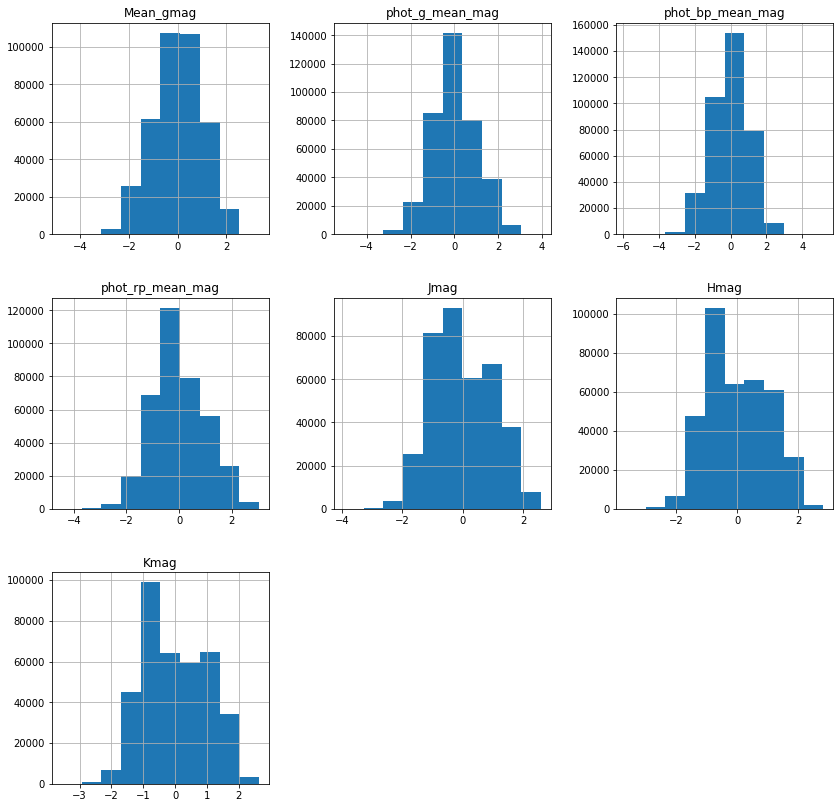

In [11]:
from sklearn.preprocessing import StandardScaler

to_scale = ['Mean_gmag','phot_g_mean_mag','phot_bp_mean_mag', 'phot_rp_mean_mag','Jmag', 'Hmag','Kmag']

ss = StandardScaler()
_ = ss.fit(df2[to_scale])

# Transform
df2[to_scale] = pd.DataFrame(ss.transform(df2[to_scale]), columns=to_scale)

# Plot
df2[to_scale].hist(figsize=(14, 14));

In [15]:
print, df2[to_scale].var()

(<function print>,
 Mean_gmag           1.000003
 phot_g_mean_mag     1.000003
 phot_bp_mean_mag    1.000003
 phot_rp_mean_mag    1.000003
 Jmag                1.000003
 Hmag                1.000003
 Kmag                1.000003
 dtype: float64)

In [16]:
print, df2[to_scale].mean().round(3)

(<function print>,
 Mean_gmag           0.0
 phot_g_mean_mag    -0.0
 phot_bp_mean_mag   -0.0
 phot_rp_mean_mag    0.0
 Jmag                0.0
 Hmag               -0.0
 Kmag                0.0
 dtype: float64)

In [5]:
col_to_drop = ['Unnamed: 0','ID']
df2 = df1.drop(columns=col_to_drop)

In [16]:
index_to_drop = df2[df2.Period.isna()].index
df2 = df2.drop(index_to_drop,axis=0)

In [17]:
df3 = df2.fillna(method = 'bfill')

In [18]:
df3.isna().sum()

ML_classification      0
Mean_gmag              0
Amplitude              0
Period                 0
parallax               0
parallax_over_error    0
pm                     0
phot_g_mean_mag        0
phot_bp_mean_mag       0
phot_rp_mean_mag       0
bp_rp                  0
FUVmag                 2
NUVmag                 0
W1mag                  0
W2mag                  0
W3mag                  0
W4mag                  0
Jmag                   0
Hmag                   0
Kmag                   0
dtype: int64

In [19]:
df3 = df3.dropna(axis = 0)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366350 entries, 0 to 378858
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ML_classification    366350 non-null  object 
 1   Mean_gmag            366350 non-null  float64
 2   Amplitude            366350 non-null  float64
 3   Period               366350 non-null  float64
 4   parallax             366350 non-null  float64
 5   parallax_over_error  366350 non-null  float64
 6   pm                   366350 non-null  float64
 7   phot_g_mean_mag      366350 non-null  float64
 8   phot_bp_mean_mag     366350 non-null  float64
 9   phot_rp_mean_mag     366350 non-null  float64
 10  bp_rp                366350 non-null  float64
 11  FUVmag               366350 non-null  float64
 12  NUVmag               366350 non-null  float64
 13  W1mag                366350 non-null  float64
 14  W2mag                366350 non-null  float64
 15  W3mag            

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Build feature/target arrays
X, y = df3.drop("ML_classification", axis=1), df3["ML_classification"]

# Set up the colnames
to_scale = ['Mean_gmag', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag',
       'W1mag', 'W2mag', 'W3mag', 'Jmag', 'Hmag', 'Kmag']
to_log = ['Amplitude', 'Period','parallax', 'parallax_over_error', 'pm', 'bp_rp', 
          'FUVmag', 'NUVmag', 'W4mag']
categorical = X.select_dtypes(include="category").columns

scale_pipe = make_pipeline(StandardScaler())
log_pipe = make_pipeline(PowerTransformer())
categorical_pipe = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"))

transformer = ColumnTransformer(
    transformers=[
        ("scale", scale_pipe, to_scale),
        ("log_transform", log_pipe, to_log),
        ("oh_encode", categorical_pipe, categorical),
    ]
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Pipeline([("prep", transformer), ("logistic_reg", LogisticRegression())])

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Encode the target
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
# Fit/predict/score
_ = knn_pipe.fit(X_train, y_train)
preds = knn_pipe.predict_proba(X_test)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9689717898408826

In [29]:
roc_auc_score(y_test, preds, multi_class="ovr", average="weighted")

0.9824545109689036

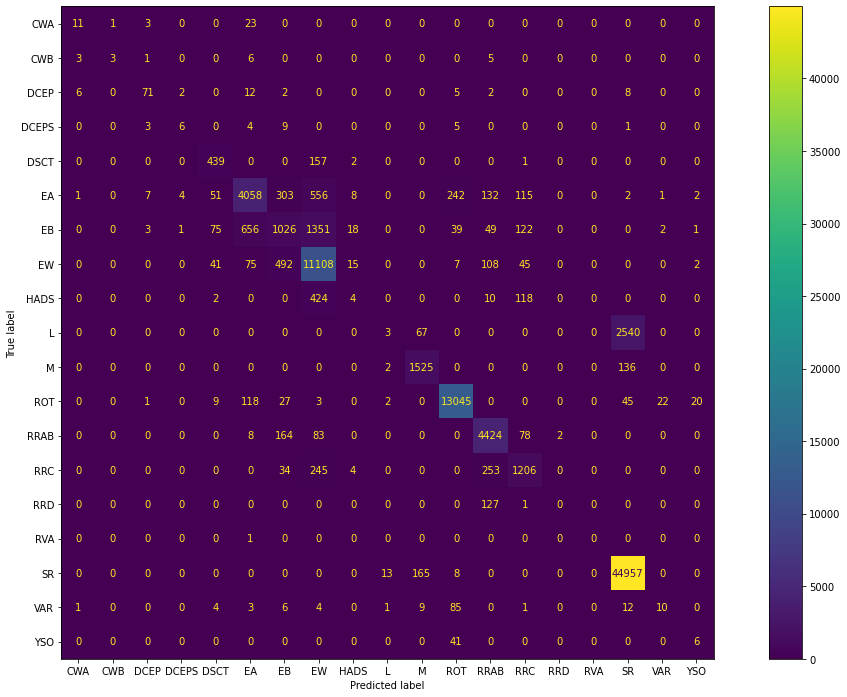

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

y_pred = knn_pipe.predict(X_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(20, 12))
# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=le.inverse_transform(knn_pipe.classes_))
cmp.plot(ax=ax)

plt.show();

In [25]:
y_test_str = pd.Series(le.inverse_transform(y_test),name='Classes')

In [26]:
y_test_str.value_counts()

SR       45143
ROT      13292
EW       11893
EA        5482
RRAB      4759
EB        3343
L         2610
RRC       1742
M         1663
DSCT       599
HADS       558
VAR        136
RRD        128
DCEP       108
YSO         47
CWA         38
DCEPS       28
CWB         18
RVA          1
Name: Classes, dtype: int64